<a href="https://colab.research.google.com/github/ashrafulalam92/A-Machine-Learning-Pipeline-for-Loan-Approval-Prediction/blob/main/CSE422_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Loan Approval Dataset.csv")

# Inspect numerical & categorical
numerical_data = df.select_dtypes(include=['number']).copy()
categorical_data = df.select_dtypes(include=['object']).copy()

print(f"There are {len(numerical_data.columns)} numerical features:\n", list(numerical_data.columns))
print(f"There are {len(categorical_data.columns)} categorical features:\n", list(categorical_data.columns))
print("\nFirst 5 rows:\n", df.head())


There are 9 numerical features:
 ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
There are 5 categorical features:
 ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

First 5 rows:
    person_age person_gender person_education  person_income  person_emp_exp  \
0          22        female           Master          71948               0   
1          21        female      High School          12282               0   
2          25        female      High School          12438               3   
3          23        female         Bachelor          79753               0   
4          24          male           Master          66135               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT      35000    PERSONAL          16.02   
1                   OWN       1000 

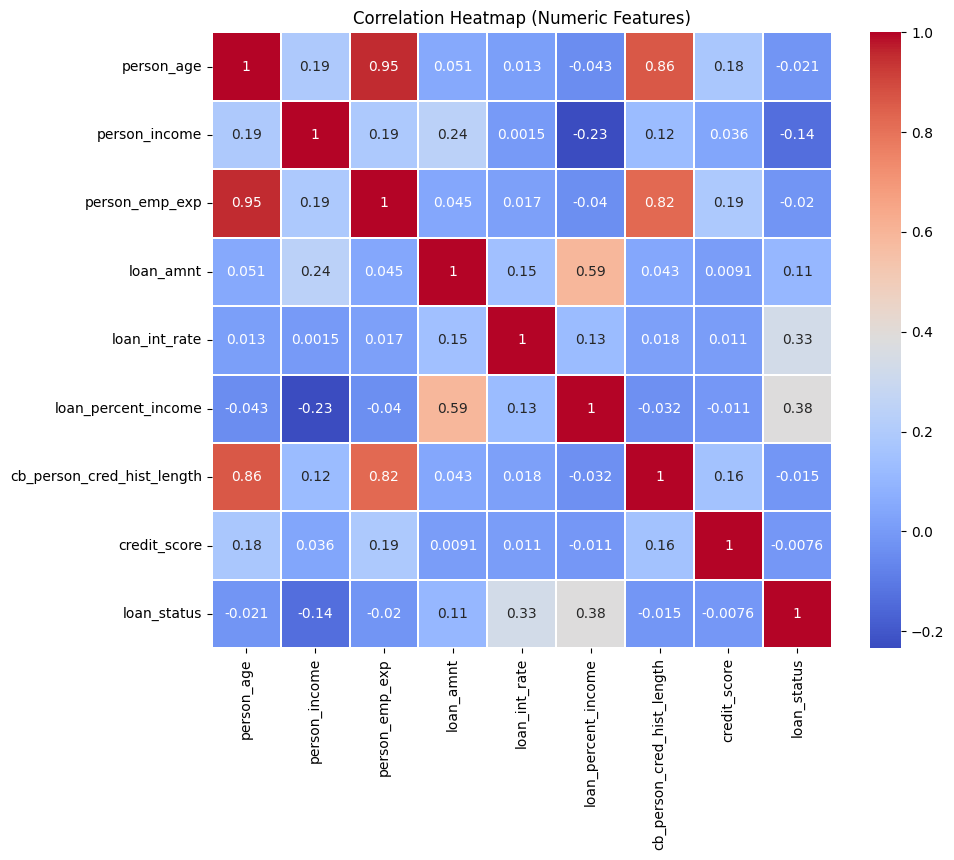

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.3)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


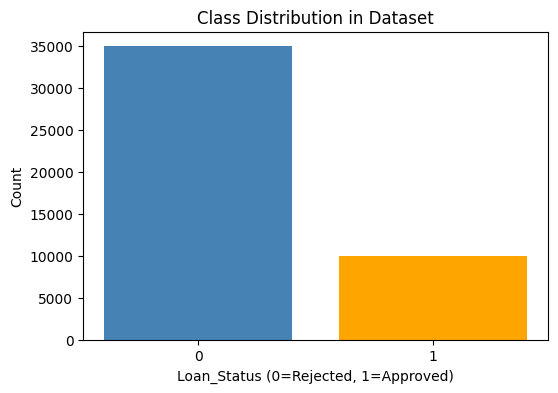

Class counts:
 loan_status
0    35000
1    10000
Name: count, dtype: int64
Percentages:
 loan_status
0    77.78
1    22.22
Name: count, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

y = df["loan_status"].astype(int)
class_counts = y.value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['steelblue','orange'])
plt.xlabel("Loan_Status (0=Rejected, 1=Approved)")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")
plt.show()

print("Class counts:\n", class_counts)
print("Percentages:\n", (class_counts / len(y) * 100).round(2))

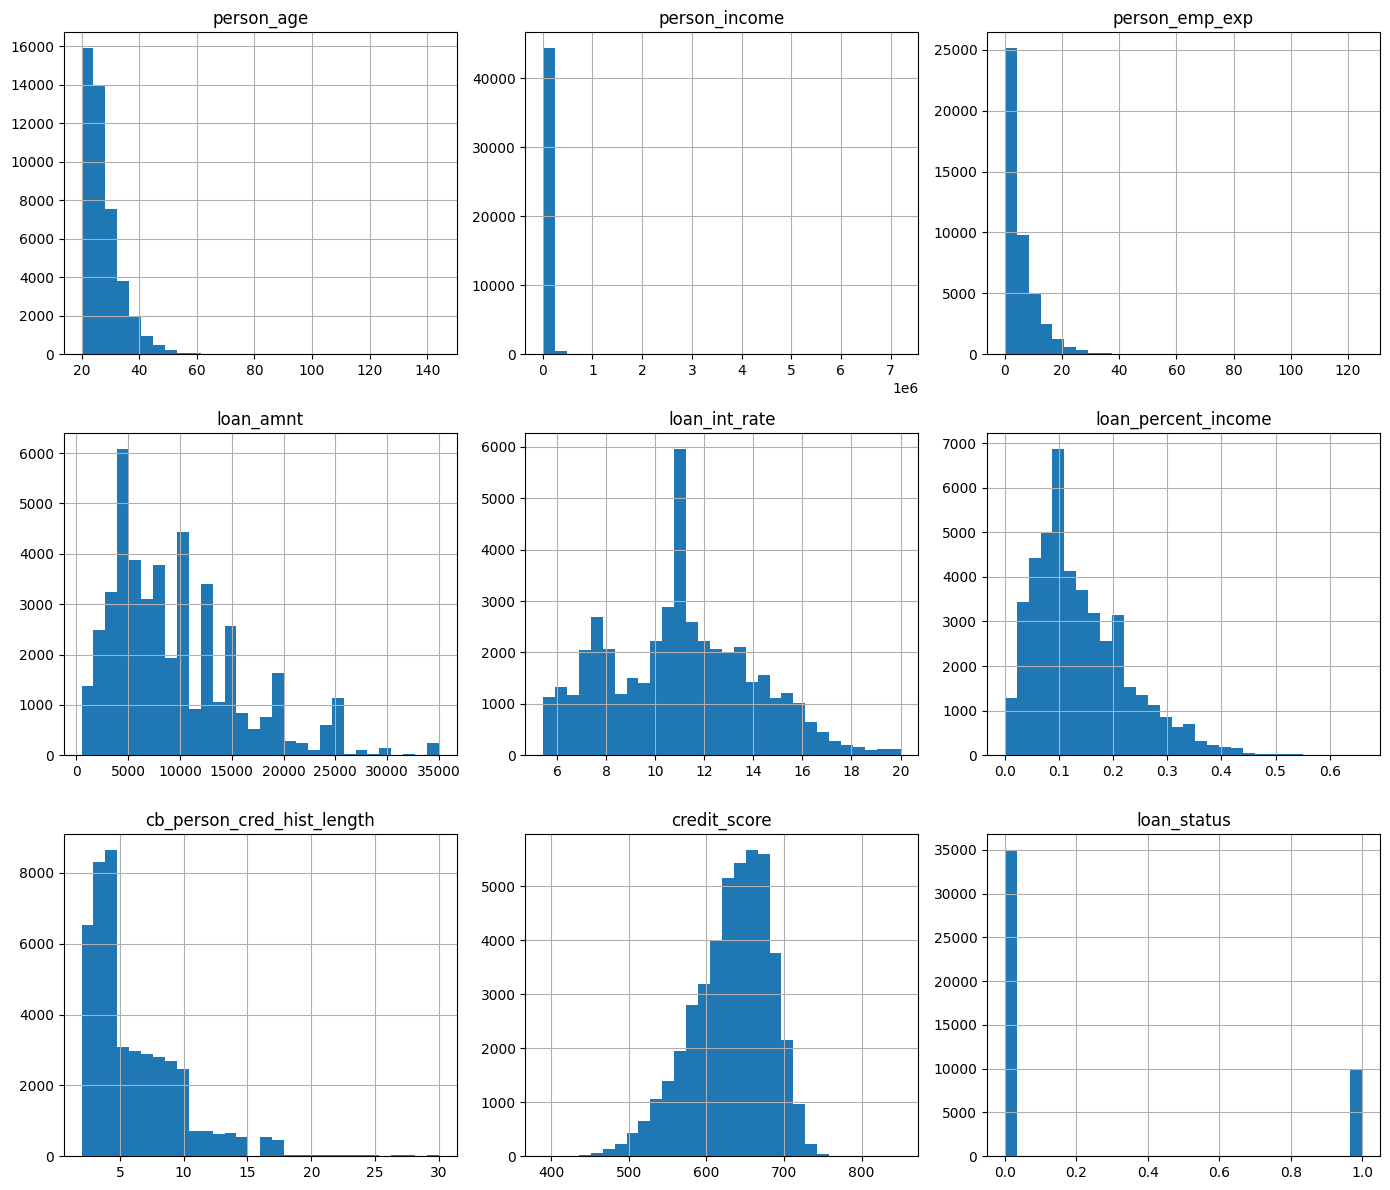

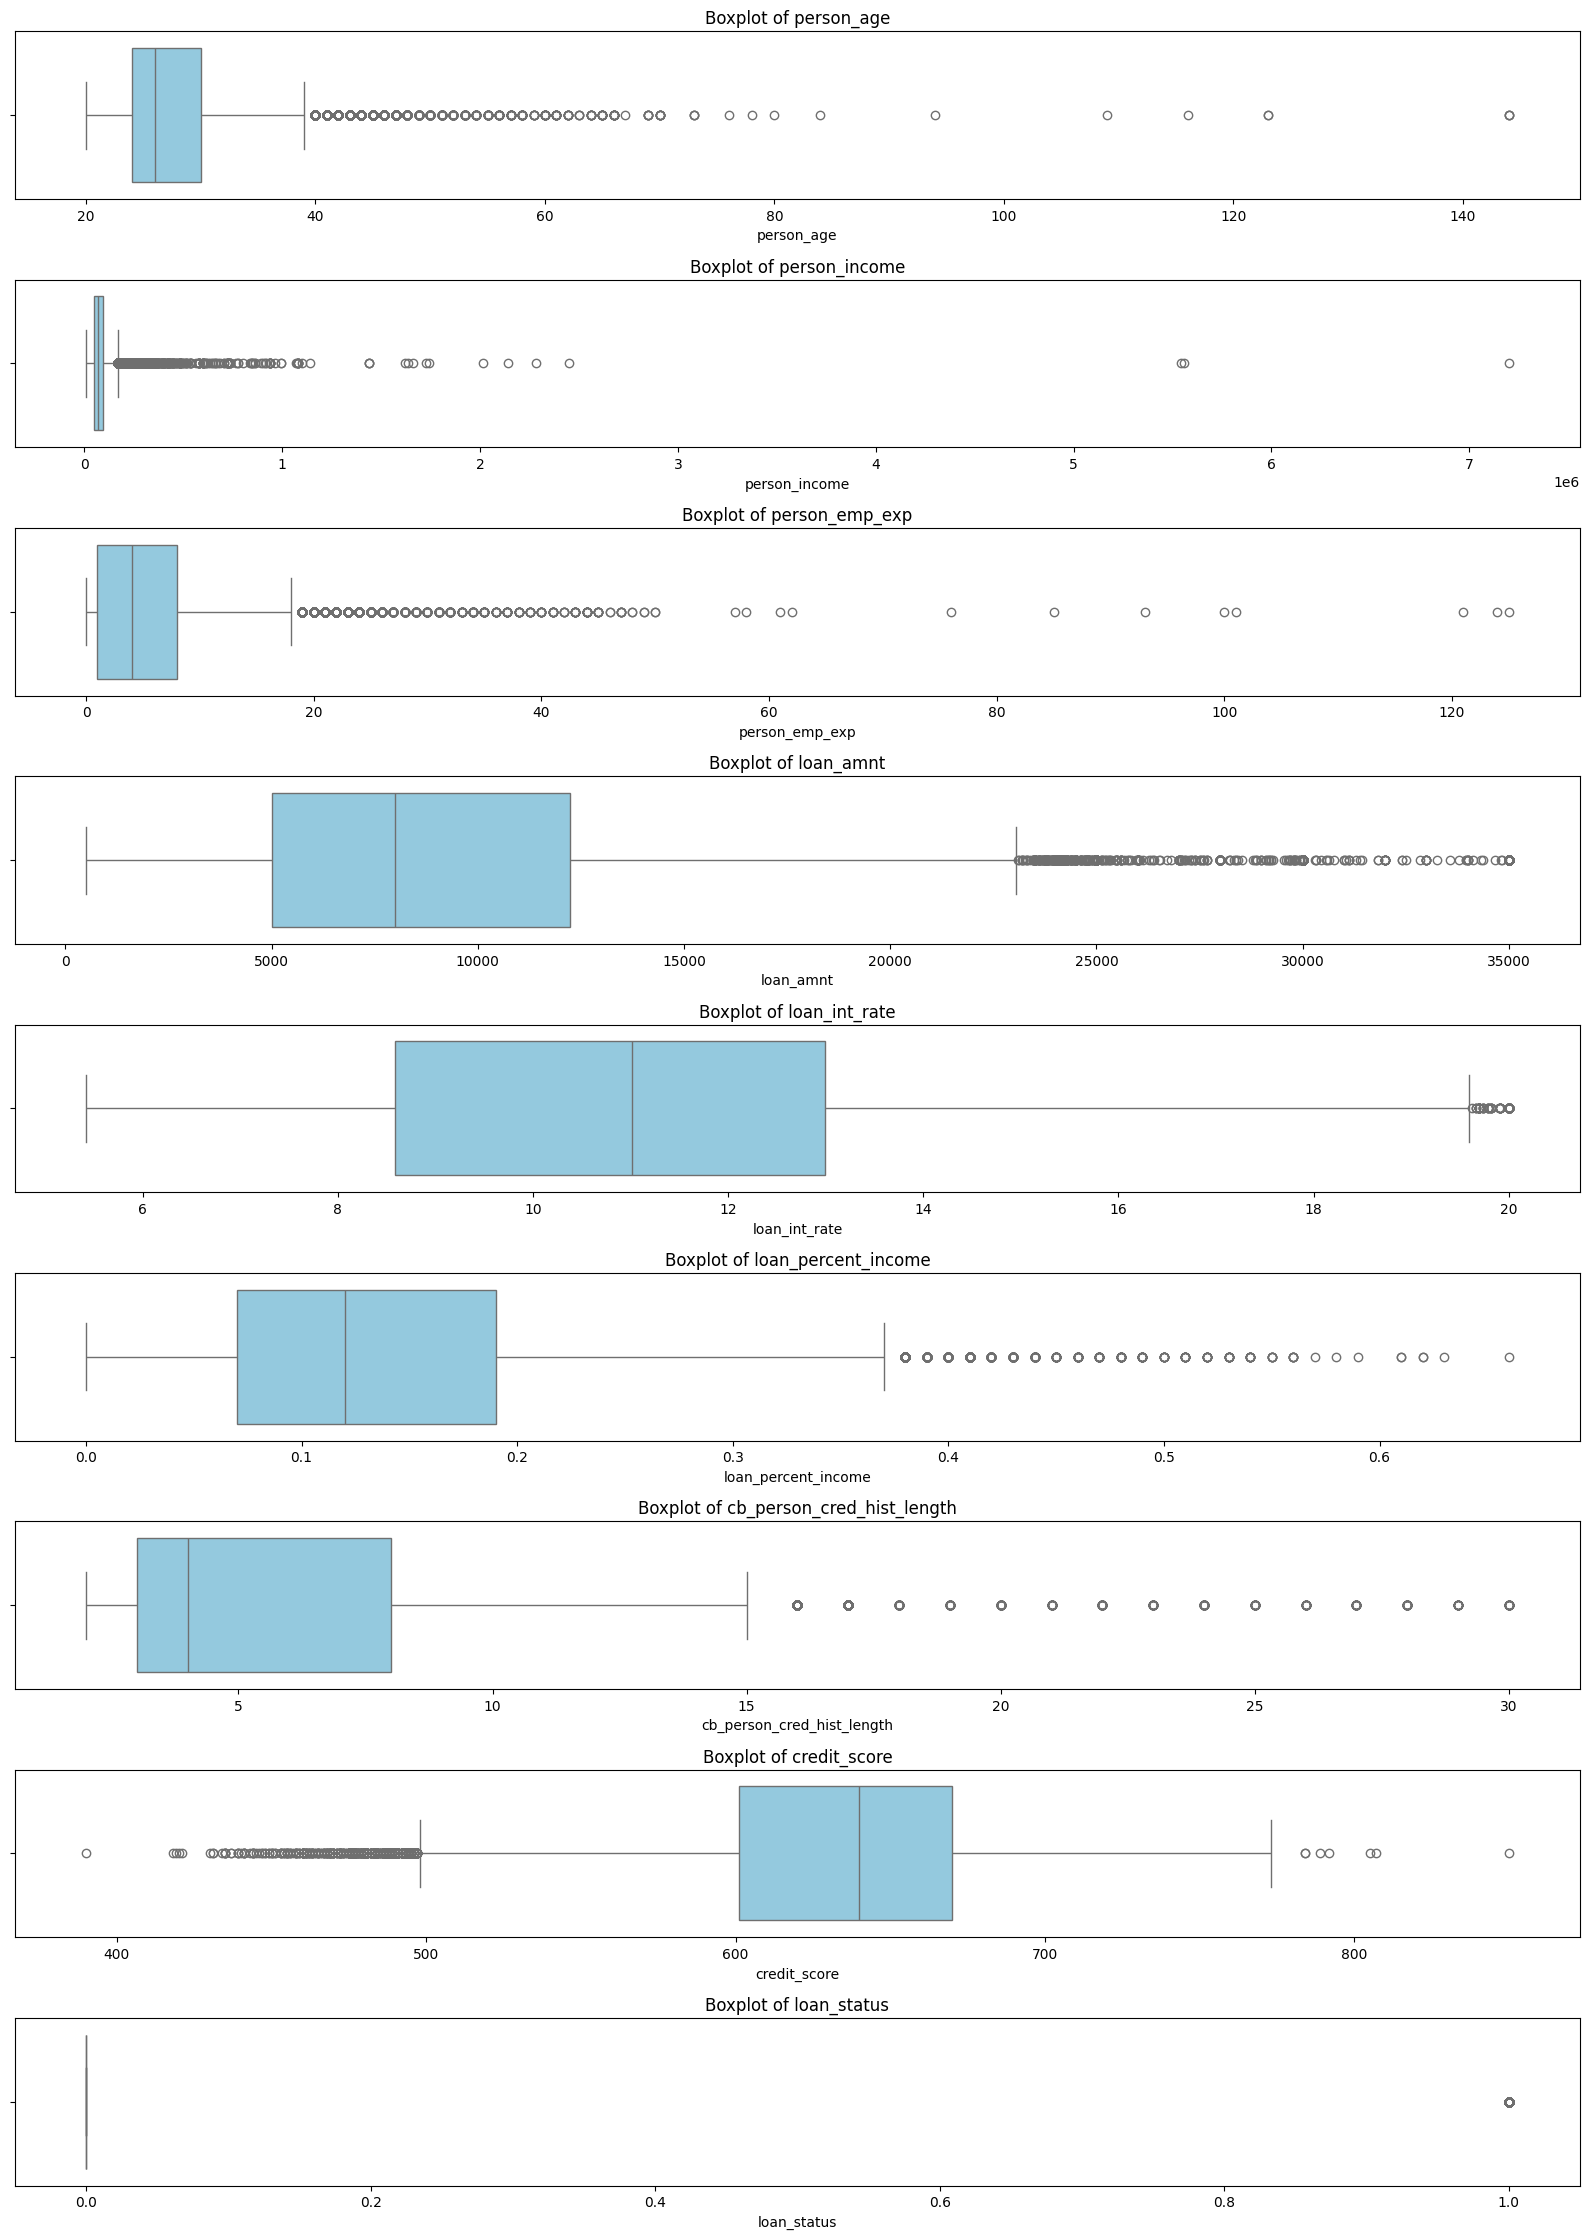

In [ ]:
# Histograms for numeric features
numerical_data.hist(figsize=(14,12), bins=30)
plt.tight_layout()
plt.show()

# Boxplots for numeric features
plt.figure(figsize=(16, 2.5*len(numerical_data.columns)))
for i, col in enumerate(numerical_data.columns, 1):
    plt.subplot(len(numerical_data.columns), 1, i)
    sns.boxplot(x=numerical_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

target_col = "loan_status"
y = df[target_col].astype(int)
X = df.drop(columns=[target_col])

# Split numeric/categorical
numerical_data = X.select_dtypes(include=['number']).copy()
categorical_data = X.select_dtypes(include=['object']).copy()

# Impute numeric
num_imputer = SimpleImputer(strategy='median')
numerical_data[:] = num_imputer.fit_transform(numerical_data)

# Impute categorical
if not categorical_data.empty:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    categorical_data[:] = cat_imputer.fit_transform(categorical_data)

# Encode categorical
for col in categorical_data.columns:
    le = LabelEncoder()
    categorical_data[col] = le.fit_transform(categorical_data[col].astype(str))

# Scale numeric
scaler = MinMaxScaler()
numerical_data[numerical_data.columns] = scaler.fit_transform(numerical_data[numerical_data.columns])

# Combine
final_df = pd.concat([numerical_data, categorical_data], axis=1)
final_df[target_col] = y.values

final_df.to_csv("final_df.csv", index=False)
print("Final dataset shape:", final_df.shape)

Final dataset shape: (45000, 14)


In [ ]:
from sklearn.model_selection import train_test_split

final_df = pd.read_csv("final_df.csv")

target_col = "loan_status"
X = final_df.drop(columns=[target_col])
y = final_df[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training distribution:\n", y_train.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))

X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)


Training distribution:
 loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64
Test distribution:
 loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64


In [ ]:
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Assuming your dataset is a DataFrame called df and target column is 'target'
# X = df.drop(columns=['loan_status'])
# y = df['loan_status']

# # Random split: 70% train, 30% test (you can adjust test_size)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=None, shuffle=True
# )

# print("Training set size:", X_train.shape)
# print("Test set size:", X_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train = pd.read_csv("X_train.csv")
X_test  = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv").squeeze()
y_test  = pd.read_csv("y_test.csv").squeeze()

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8945185185185185
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     10500
           1       0.78      0.74      0.76      3000

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.84     13500
weighted avg       0.89      0.89      0.89     13500



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


KNN Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     10500
           1       0.79      0.68      0.73      3000

    accuracy                           0.89     13500
   macro avg       0.85      0.82      0.83     13500
weighted avg       0.89      0.89      0.89     13500



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.8955555555555555
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     10500
           1       0.76      0.77      0.77      3000

    accuracy                           0.90     13500
   macro avg       0.85      0.85      0.85     13500
weighted avg       0.90      0.90      0.90     13500



In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64,32), activation="relu", max_iter=500)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Neural Network Accuracy: 0.9176296296296297
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10500
           1       0.88      0.73      0.80      3000

    accuracy                           0.92     13500
   macro avg       0.90      0.85      0.87     13500
weighted avg       0.92      0.92      0.91     13500



Cluster counts:
 cluster
1    25750
2    12930
0     6320
Name: count, dtype: int64


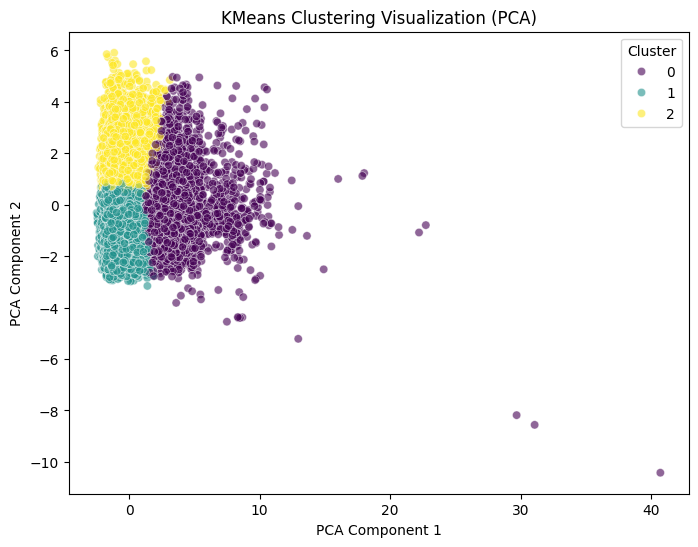

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed dataset
final_df = pd.read_csv("final_df.csv")

# Drop the target column to use only features for clustering
X = final_df.drop(columns=['loan_status'])

# Scale features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (can be tuned)
num_clusters = 3

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
final_df['cluster'] = clusters

# Display count of samples per cluster
print("Cluster counts:\n", final_df['cluster'].value_counts())

# Optional: visualize clusters using first two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='viridis', alpha=0.6)
plt.title('KMeans Clustering Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()



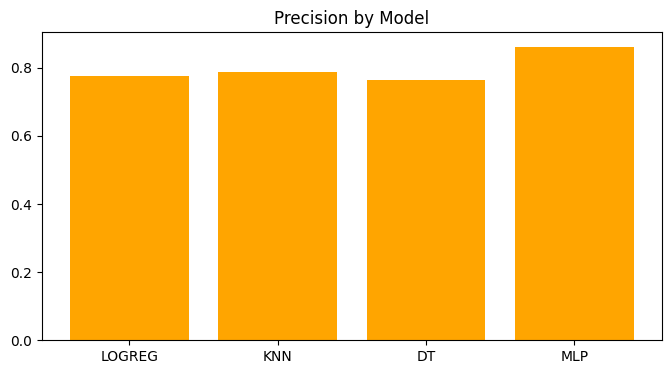

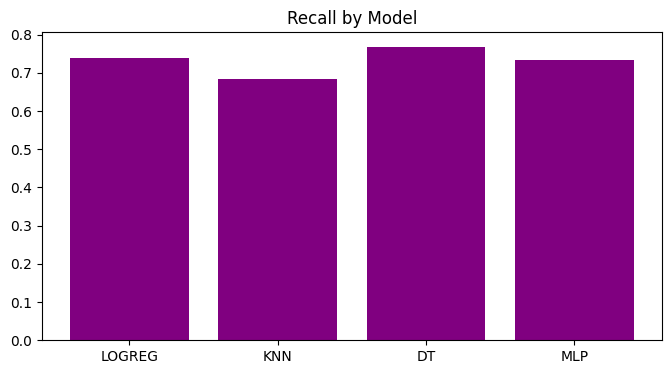

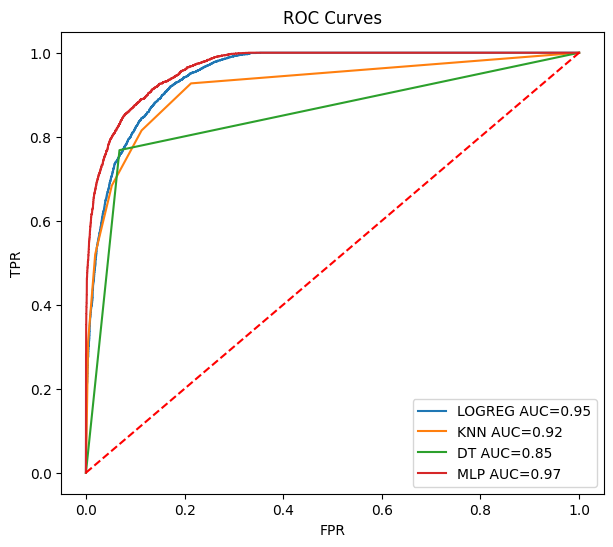

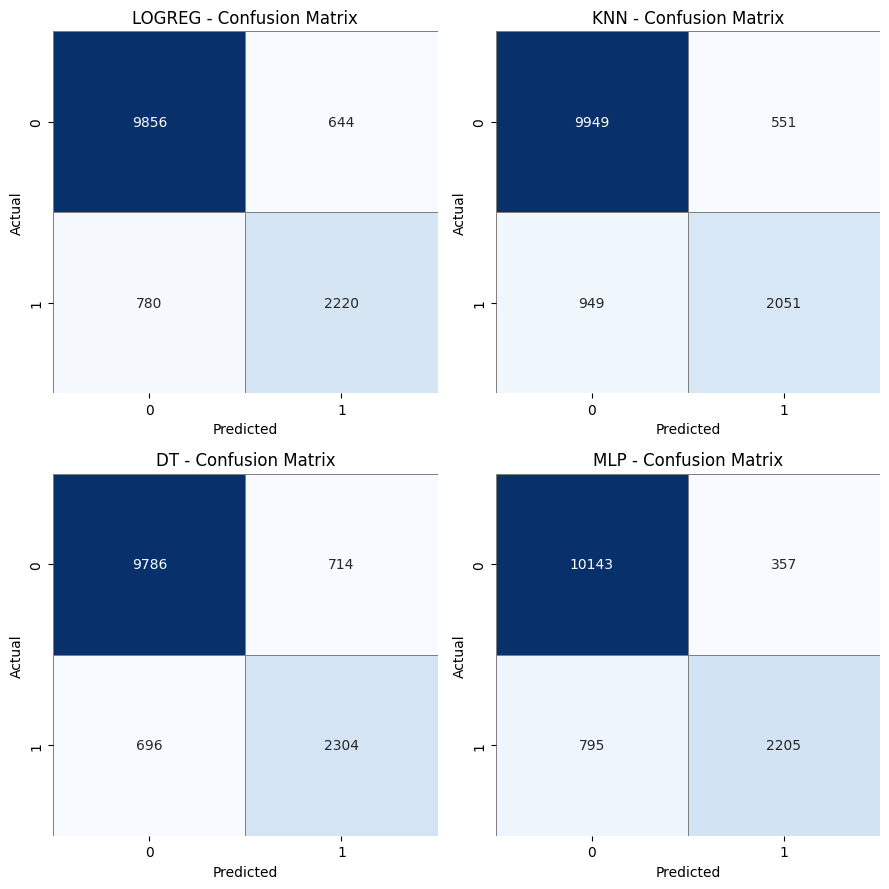

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import math

models = {
    "LOGREG": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DT": DecisionTreeClassifier(random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(64,32), activation="relu", max_iter=500),
}

precisions, recalls, confs, roc_curves = {}, {}, {}, []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    precisions[name] = precision_score(y_test, y_pred, zero_division=0)
    recalls[name]    = recall_score(y_test, y_pred, zero_division=0)
    confs[name]      = confusion_matrix(y_test, y_pred)

    # ROC (where available)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_curves.append((name, fpr, tpr, auc(fpr, tpr)))

# Precision and Recall bars
plt.figure(figsize=(8,4))
plt.bar(precisions.keys(), precisions.values(), color='orange')
plt.title("Precision by Model")
plt.show()

plt.figure(figsize=(8,4))
plt.bar(recalls.keys(), recalls.values(), color='purple')
plt.title("Recall by Model")
plt.show()

# ROC Curves
plt.figure(figsize=(7,6))
for name, fpr, tpr, roc_auc in roc_curves:
    plt.plot(fpr, tpr, label=f"{name} AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curves")
plt.legend()
plt.show()


# Confusion matrices (grid view)
n = len(confs)
cols = 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(9, 4.5*rows))
axes = axes.flatten()
for ax, (name, cm) in zip(axes, confs.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['0','1'], yticklabels=['0','1'],
                cbar=False, linewidths=0.5, linecolor='gray', ax=ax)
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
for k in range(len(confs), len(axes)):
    fig.delaxes(axes[k])
plt.tight_layout()
plt.show()